In [1]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


In [2]:
#Plotting fitness as a function of s:
sug_arr = np.arange(50,600,0.1)
#Fitnesses for unregulated and regulated, absolute and normalized:
fit_unreg_arr = np.zeros_like(sug_arr)
fit_unreg_norm_arr = np.zeros_like(sug_arr)
fit_reg_arr = np.zeros_like(sug_arr)
fit_reg_norm_arr = np.zeros_like(sug_arr)
#The maximum and minimum values of fitness for given sugar:
max_fit_sug = np.zeros_like(sug_arr)
min_fit_sug = np.zeros_like(sug_arr)

#The unregulated distribution, purely a function of alpha:
p0_unreg_sug = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg_sug = p0_unreg_sug/np.trapz(p0_unreg_sug,dx=dg)

#Calculating fitness for various
for sug_idx in range(len(sug_arr)):
    #The sugar
    sug = sug_arr[sug_idx]
    #Fitness and the optimal expression value:
    fit_sug = fitness(g,sug,delta)
    g_reg_sug = g[np.argmax(fit_sug)]
    #The regulated distribution:
    p0_reg_sug = Gaussian(g,g_reg_sug,np.maximum(np.sqrt(alpha*g_reg_sug),1))
    p0_reg_sug = p0_reg_sug/np.trapz(p0_reg_sug,dx=dg)
    #The max, mean fitnesses for given sugar and the dynamic range between them:
    max_fit_sug[sug_idx] = np.max(fit_sug)
    min_fit_sug[sug_idx] = np.min(fit_sug)
    fit_range_sug = max_fit_sug[sug_idx]-min_fit_sug[sug_idx]
    #Fitness of unregulated and regulated distributions:
    fit_unreg_arr[sug_idx] = mean_wrt_P(fit_sug,p0_unreg_sug,g)
    fit_unreg_norm_arr[sug_idx] = (fit_unreg_arr[sug_idx]-min_fit_sug[sug_idx])/fit_range_sug
    fit_reg_arr[sug_idx] = mean_wrt_P(fit_sug,p0_reg_sug,g)
    fit_reg_norm_arr[sug_idx] = (fit_reg_arr[sug_idx]-min_fit_sug[sug_idx])/fit_range_sug

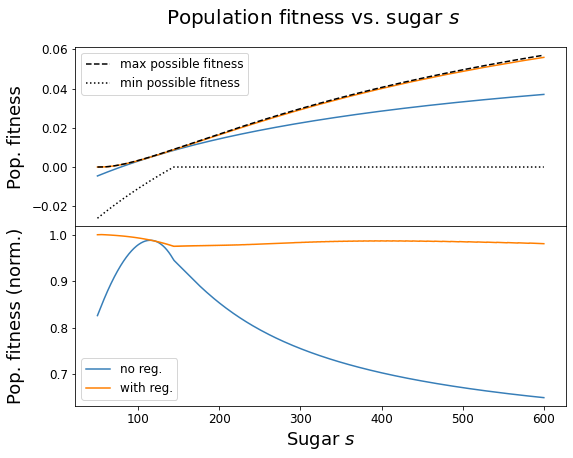

In [3]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=[8.8,6.6])

ax[0].plot(sug_arr,fit_unreg_arr,color=CB_colors[0])
ax[0].plot(sug_arr,fit_reg_arr,color=CB_colors[1])
ax[0].plot(sug_arr,max_fit_sug,'k--',label='max possible fitness')
ax[0].plot(sug_arr,min_fit_sug,'k:',label='min possible fitness')
ax[0].legend(loc='best',fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=10)
ax[0].text(-0.12,0.5, "Pop. fitness", ha='center', va='center', rotation='vertical', transform=ax[0].transAxes, fontsize=18)

ax[1].plot(sug_arr,fit_unreg_norm_arr,color=CB_colors[0],label='no reg.')
ax[1].plot(sug_arr,fit_reg_norm_arr,color=CB_colors[1],label='with reg.')
ax[1].legend(loc='best',fontsize=12)
ax[1].set_xlabel(r'Sugar $s$',fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
ax[1].text(-0.12,0.5, "Pop. fitness (norm.)", ha='center', va='center', rotation='vertical', transform=ax[1].transAxes, fontsize=18)

fig.text(0.5,0.94, "Population fitness vs. sugar $s$", ha='center', va='center', fontsize=20)

plt.subplots_adjust(hspace=0)

# fig.savefig("1a_fitness_vs_sugar.pdf",format="pdf",dpi=1200,bbox_inches="tight",pad_inches=0.05)